In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import pandas as pd
data_raw = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [2]:
data_raw.head()  # First 5 rows
data_raw.head(10)  # First 10 rows

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_raw.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data_raw.shape

(891, 12)

In [5]:
data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(data_raw['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [7]:
data_raw['Age'].fillna(data_raw['Age'].mean(), inplace=True)

/tmp/ipykernel_35/161255724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Age'].fillna(data_raw['Age'].mean(), inplace=True)


In [8]:
data_raw.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.7500,NaN,Q


In [9]:
data_raw['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipykernel_35/2450911565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Cabin'].fillna('Unknown', inplace=True)


In [10]:
# Extract first letter (e.g., 'C' from 'C123')
data_raw['Cabin_deck'] = data_raw['Cabin'].str[0]
data_raw['Cabin_deck'].fillna('Unknown', inplace=True)

/tmp/ipykernel_35/3724651858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Cabin_deck'].fillna('Unknown', inplace=True)


In [12]:
print("Missing Values After Imputation:")
print(data_raw[['Age', 'Cabin_deck']].isnull().sum())

Missing Values After Imputation:
Age           0
Cabin_deck    0
dtype: int64


In [13]:
unique_values = data_raw['Cabin_deck'].unique()
print(unique_values)

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [14]:
value_counts = data_raw['Cabin_deck'].value_counts(dropna=False)  # Include NaN
print(value_counts)

Cabin_deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the 'Cabin_deck' column
data_raw['Cabin_deck_encoded'] = le.fit_transform(data_raw['Cabin_deck'])

# Check mapping (optional)
print("Category to Integer Mapping:")
for i, cat in enumerate(le.classes_):
    print(f"{cat}: {i}")

Category to Integer Mapping:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6
T: 7
U: 8


In [16]:
data_raw['Cabin_deck_encoded'] = pd.factorize(data_raw['Cabin_deck'])[0]

# Check unique mappings
print(data_raw[['Cabin_deck', 'Cabin_deck_encoded']].drop_duplicates())

    Cabin_deck  Cabin_deck_encoded
0            U                   0
1            C                   1
6            E                   2
10           G                   3
21           D                   4
23           A                   5
31           B                   6
66           F                   7
339          T                   8


In [17]:
deck_order = {'U': 0, 'T': 1, 'G': 2, 'F': 3, 'E': 4, 'D': 5, 'C': 6, 'B': 7, 'A': 8}
data_raw['Cabin_deck_encoded'] = data_raw['Cabin_deck'].map(deck_order)

In [18]:
port_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data_raw['Embarked_expanded'] = data_raw['Embarked'].map(port_map)

In [19]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,Cabin_deck_encoded,Embarked_expanded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U,0,Southampton


In [20]:
data_raw.drop(['Cabin_deck','Embarked'],axis=1,inplace=True)

In [21]:
data_clean = data_raw.rename(columns={
    'Embarked_expanded': 'Boarding_Port',  # Rename one column
    'Pclass': 'Passenger_Class',
    'PassengerId': 'Passenger_id',
    'SibSp':'Siblings+Spouse',
    'Parch':"Parents_children",# Rename another
    "Cabin_deck_encoded":"Cabin_deck"
})

In [22]:
data_clean.head()

,Passenger_id,Survived,Passenger_Class,Name,Sex,Age,Siblings+Spouse,Parents_children,Ticket,Fare,Cabin,Cabin_deck,Boarding_Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,0,Southampton


In [23]:
data_clean.drop('Cabin',axis=1,inplace=True)

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passenger_id      891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Passenger_Class   891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   Siblings+Spouse   891 non-null    int64  
 7   Parents_children  891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin_deck        891 non-null    int64  
 11  Boarding_Port     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [25]:
data_clean.head()

,Passenger_id,Survived,Passenger_Class,Name,Sex,Age,Siblings+Spouse,Parents_children,Ticket,Fare,Cabin_deck,Boarding_Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,Southampton


In [26]:
data_clean['Sex'] = data_clean['Sex'].replace({'Male': 'M', 'Female': 'F'})

In [27]:
data_clean['Cabin_deck'].isnull().sum()

0

In [28]:
data_clean['Sex'] = data_clean['Sex'].str.title().replace({'Male': 'M', 'Female': 'F'})

In [29]:
data_clean

,Passenger_id,Survived,Passenger_Class,Name,Sex,Age,Siblings+Spouse,Parents_children,Ticket,Fare,Cabin_deck,Boarding_Port
0,1,0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,7.2500,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,71.2833,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,7.9250,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.000000,1,0,113803,53.1000,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,8.0500,0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,13.0000,0,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.0000,7,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.4500,0,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.0000,6,Cherbourg


In [30]:
data_clean = data_clean.rename(columns={'Parents_children': 'Parents+children'})

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passenger_id      891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Passenger_Class   891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   Siblings+Spouse   891 non-null    int64  
 7   Parents+children  891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin_deck        891 non-null    int64  
 11  Boarding_Port     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [32]:
data_clean.to_csv('transformed_titanic.csv', index=False)  # Excludes row indices

In [33]:
import os
if os.path.exists('transformed_titanic.csv'):
    loaded_df = pd.read_csv('transformed_titanic.csv')
    print("File loaded successfully!\n", loaded_df.head())
else:
    print("Save failed. Check permissions/path.")

File loaded successfully!
    Passenger_id  Survived  Passenger_Class  \
0             1         0                3   
1             2         1                1   
2             3         1                3   
3             4         1                1   
4             5         0                3   

                                                Name Sex   Age  \
0                            Braund, Mr. Owen Harris   M  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   F  38.0   
2                             Heikkinen, Miss. Laina   F  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   F  35.0   
4                           Allen, Mr. William Henry   M  35.0   

   Siblings+Spouse  Parents+children            Ticket     Fare  Cabin_deck  \
0                1                 0         A/5 21171   7.2500           0   
1                1                 0          PC 17599  71.2833           6   
2                0                 0  STON/O2. 3101282   7.925

In [34]:
import os
print(os.getcwd())  # Shows current directory

/kaggle/working


In [35]:
new_data = pd.read_csv("/kaggle/working/transformed_titanic.csv")

In [36]:
new_data

,Passenger_id,Survived,Passenger_Class,Name,Sex,Age,Siblings+Spouse,Parents+children,Ticket,Fare,Cabin_deck,Boarding_Port
0,1,0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,7.2500,0,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,71.2833,6,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,7.9250,0,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.000000,1,0,113803,53.1000,6,Southampton
4,5,0,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,8.0500,0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,13.0000,0,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.0000,7,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.4500,0,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.0000,6,Cherbourg


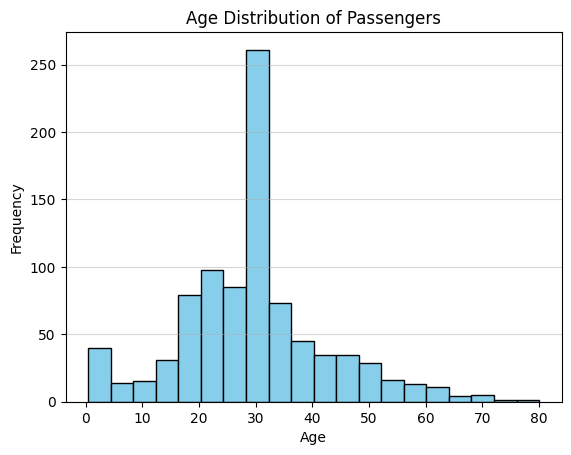

In [41]:
import matplotlib.pyplot as plt

# Histogram for 'Age'
plt.hist(new_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


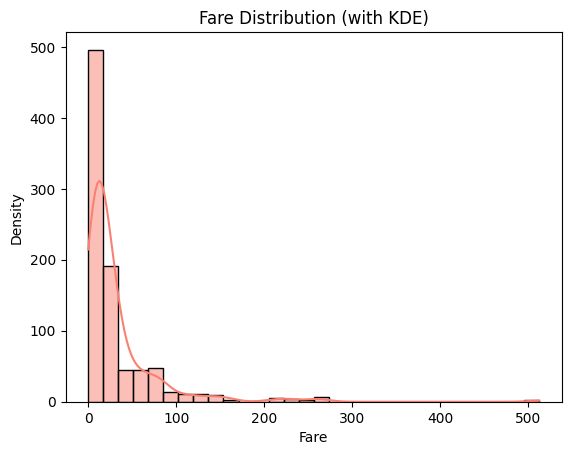

In [42]:
import seaborn as sns

# Histogram + KDE for 'Fare'
sns.histplot(new_data['Fare'], kde=True, bins=30, color='salmon')
plt.title('Fare Distribution (with KDE)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


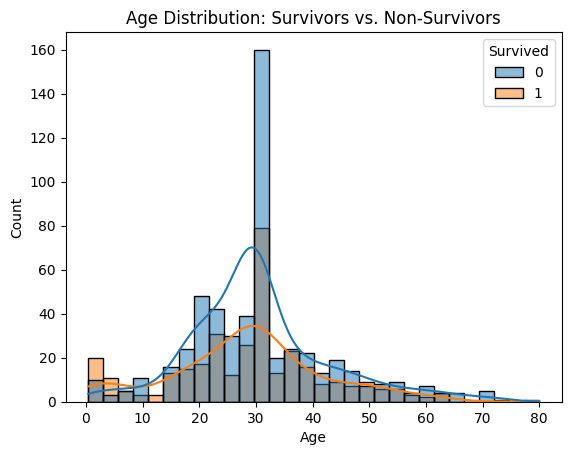

In [178]:
sns.histplot(data=new_data, x='Age', hue='Survived', kde=True, bins=30)
import matplotlib.pyplot as plt
plt.title("Age Distribution: Survivors vs. Non-Survivors");

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


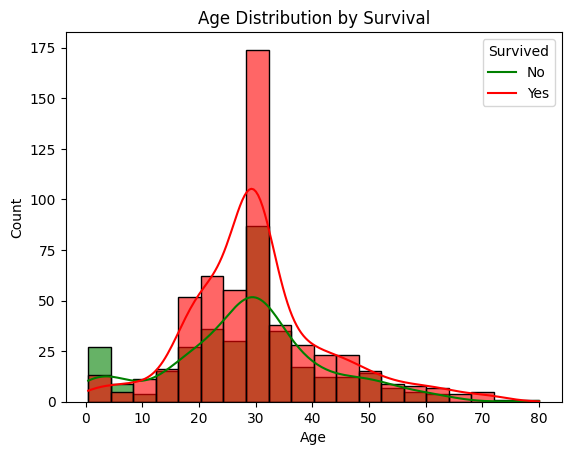

In [43]:
# Histogram of 'Age' grouped by 'Survived'
sns.histplot(data=new_data, x='Age', hue='Survived', bins=20, kde=True, 
             palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Age Distribution by Survival')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

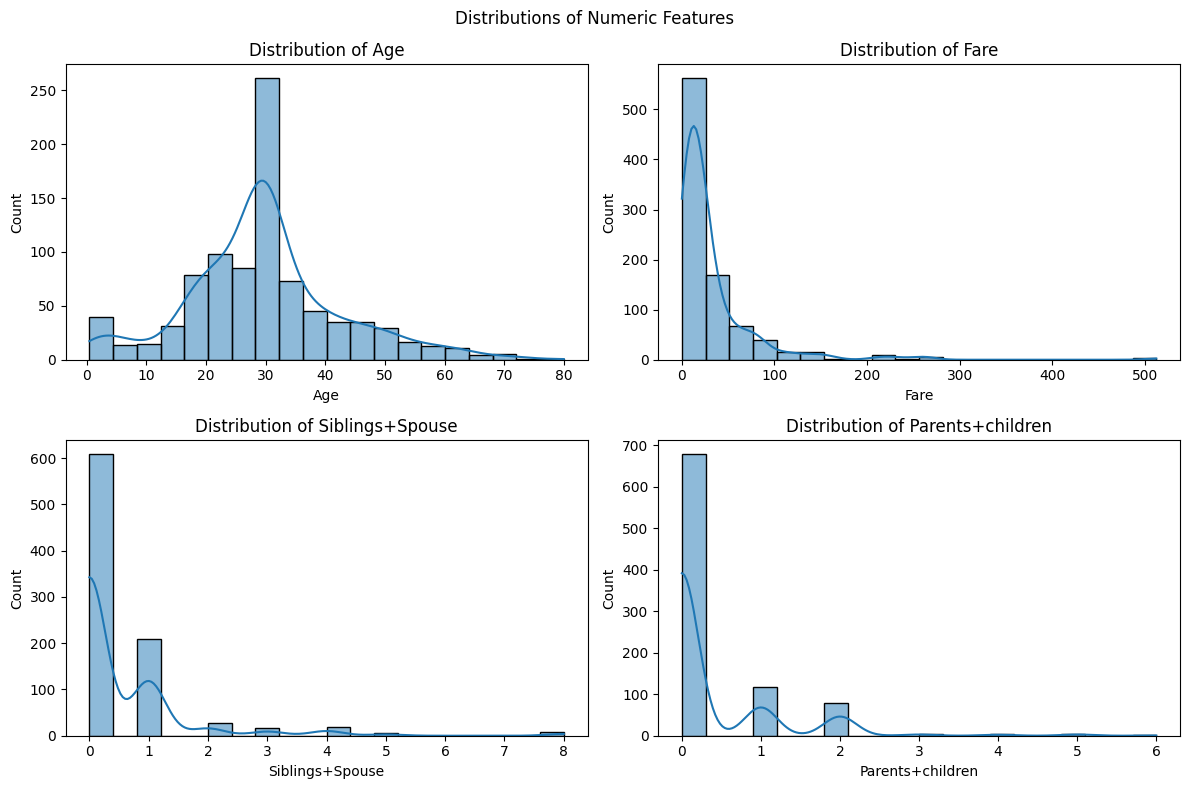

In [44]:
# Select numeric columns
numeric_cols = ['Age', 'Fare', 'Siblings+Spouse', 'Parents+children']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distributions of Numeric Features')

for col, ax in zip(numeric_cols, axes.ravel()):
    sns.histplot(new_data[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

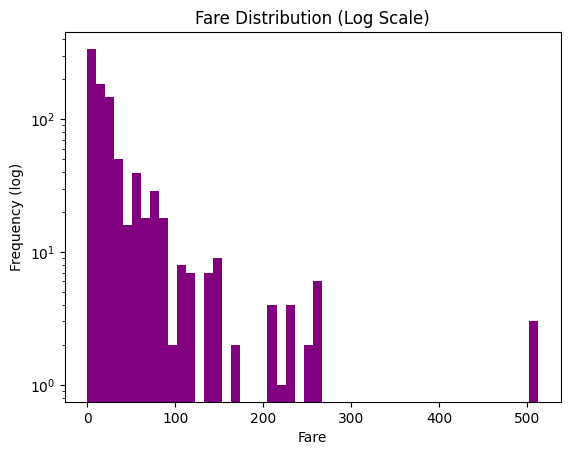

In [45]:
plt.hist(new_data['Fare'], bins=50, color='purple', log=True)  # log-scale y-axis
plt.title('Fare Distribution (Log Scale)')
plt.xlabel('Fare')
plt.ylabel('Frequency (log)')
plt.show()

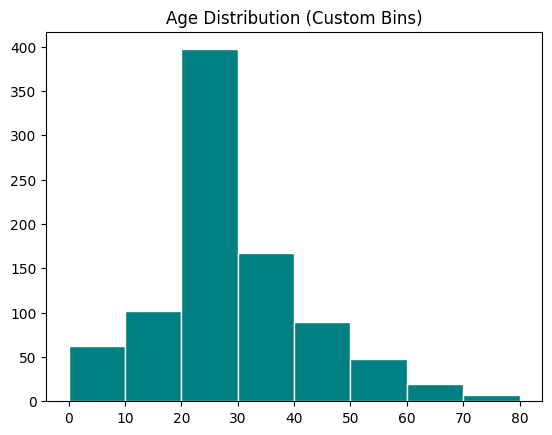

In [46]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(new_data['Age'], bins=bin_edges, color='teal', edgecolor='white')
plt.title('Age Distribution (Custom Bins)')
plt.xticks(bin_edges)
plt.show()

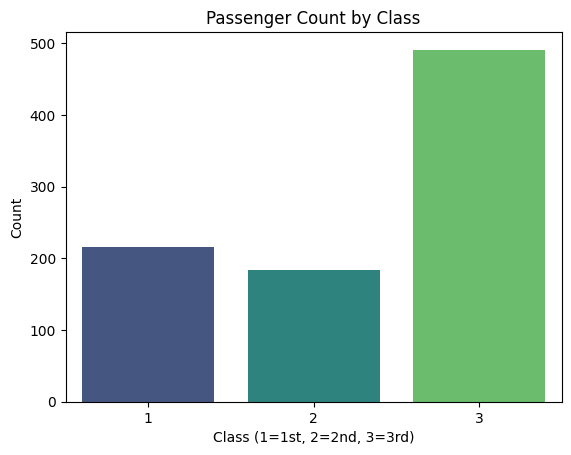

In [47]:
sns.countplot(x='Passenger_Class', data = new_data, palette='viridis')
plt.title('Passenger Count by Class')
plt.xlabel('Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.show()

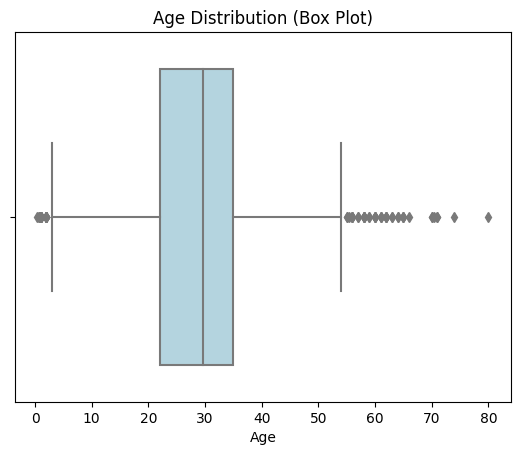

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Age'
sns.boxplot(x=new_data['Age'], color='lightblue')
plt.title('Age Distribution (Box Plot)')
plt.xlabel('Age')
plt.show()

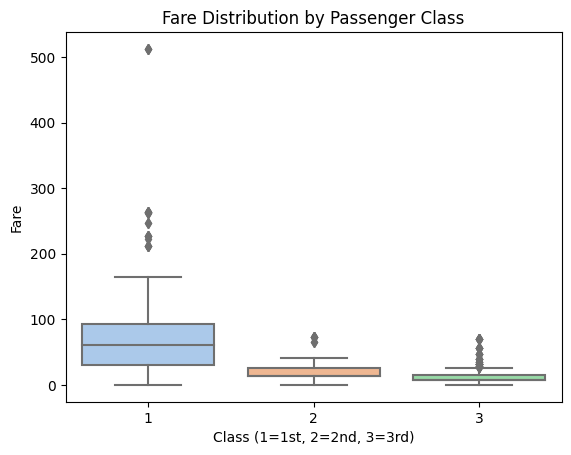

In [50]:
# Box plot of 'Fare' grouped by 'Passenger_Class'
sns.boxplot(x='Passenger_Class', y='Fare', data=new_data, palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Fare')
plt.show()

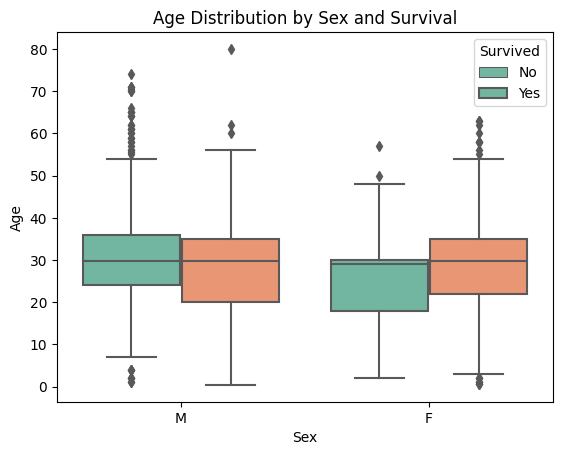

In [51]:
# Box plot of 'Age' grouped by 'Sex' and colored by 'Survived'
sns.boxplot(x='Sex', y='Age', hue='Survived', data=new_data, palette='Set2')
plt.title('Age Distribution by Sex and Survival')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the mar

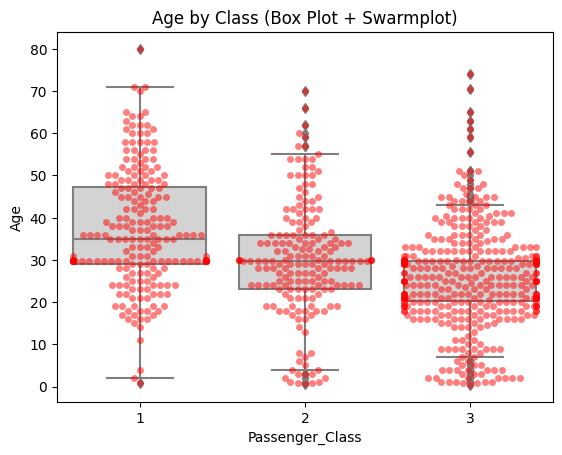

In [52]:
sns.boxplot(x='Passenger_Class', y='Age', data=new_data, color='lightgray')
sns.swarmplot(x='Passenger_Class', y='Age', data=new_data, color='red', alpha=0.5)
plt.title('Age by Class (Box Plot + Swarmplot)')
plt.show()

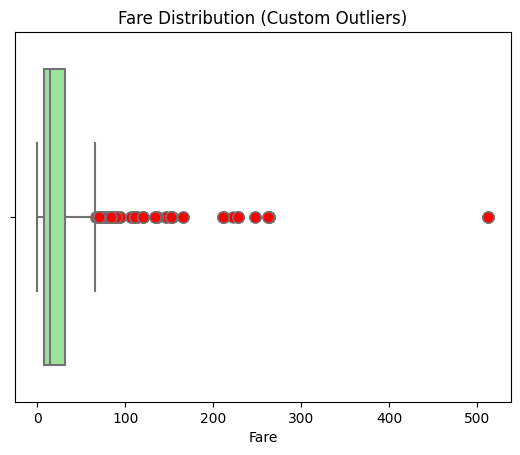

In [54]:
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
sns.boxplot(x='Fare', data=new_data, flierprops=flierprops, color='lightgreen')
plt.title('Fare Distribution (Custom Outliers)')
plt.show()

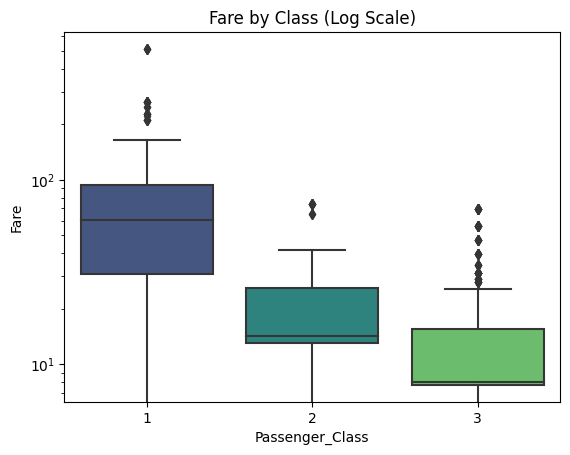

In [55]:
plt.yscale('log')  # Log-transform y-axis
sns.boxplot(x='Passenger_Class', y='Fare', data=new_data, palette='viridis')
plt.title('Fare by Class (Log Scale)')
plt.show()

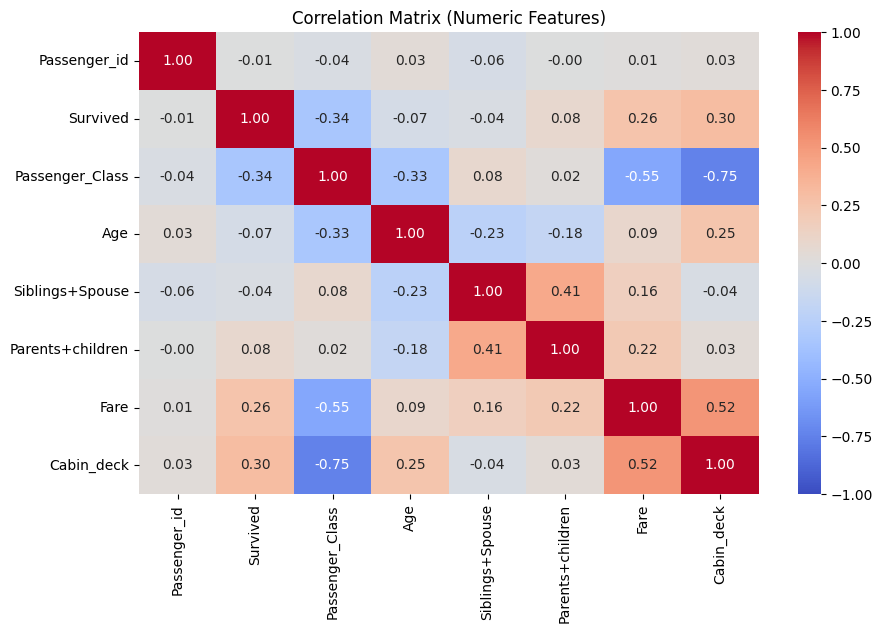

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations (numeric columns only)
corr = new_data.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

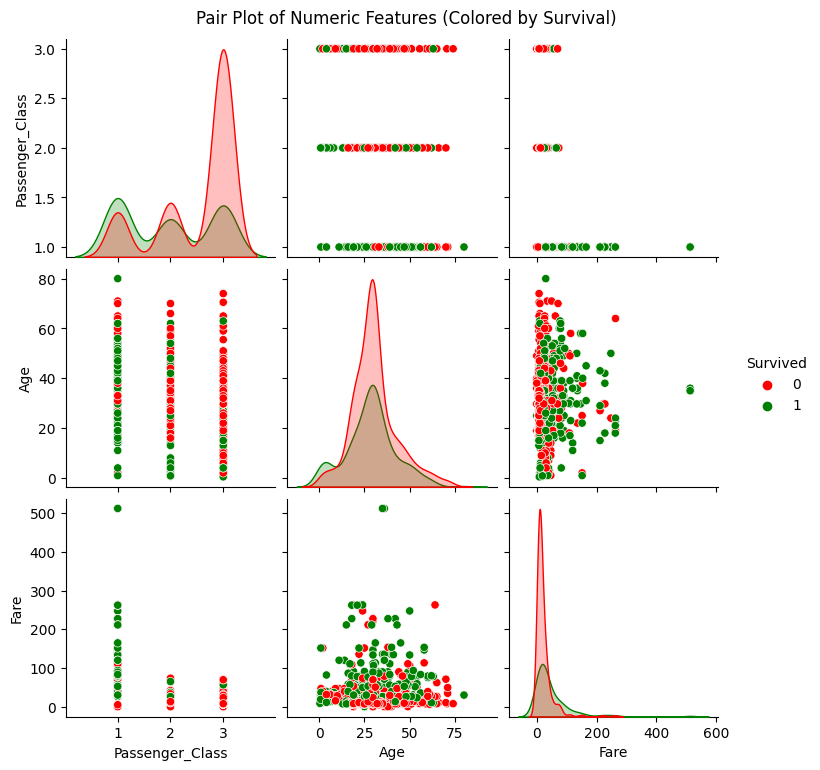

In [57]:
# Select key numeric columns
pairplot_cols = ['Survived', 'Passenger_Class', 'Age', 'Fare']

# Plot (use hue for categorical variables)
sns.pairplot(new_data[pairplot_cols].dropna(), hue='Survived', palette={0: 'red', 1: 'green'})
plt.suptitle("Pair Plot of Numeric Features (Colored by Survival)", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

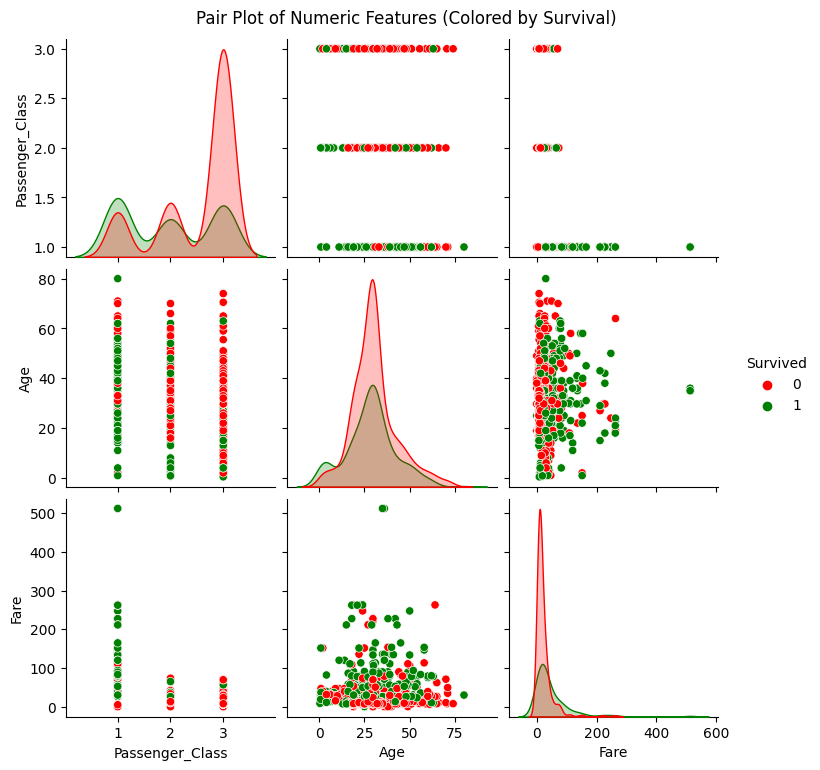

In [58]:
# Select key numeric columns
pairplot_cols = ['Survived', 'Passenger_Class', 'Age', 'Fare']

# Plot (use hue for categorical variables)
sns.pairplot(new_data[pairplot_cols].dropna(), hue='Survived', palette={0: 'red', 1: 'green'})
plt.suptitle("Pair Plot of Numeric Features (Colored by Survival)", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

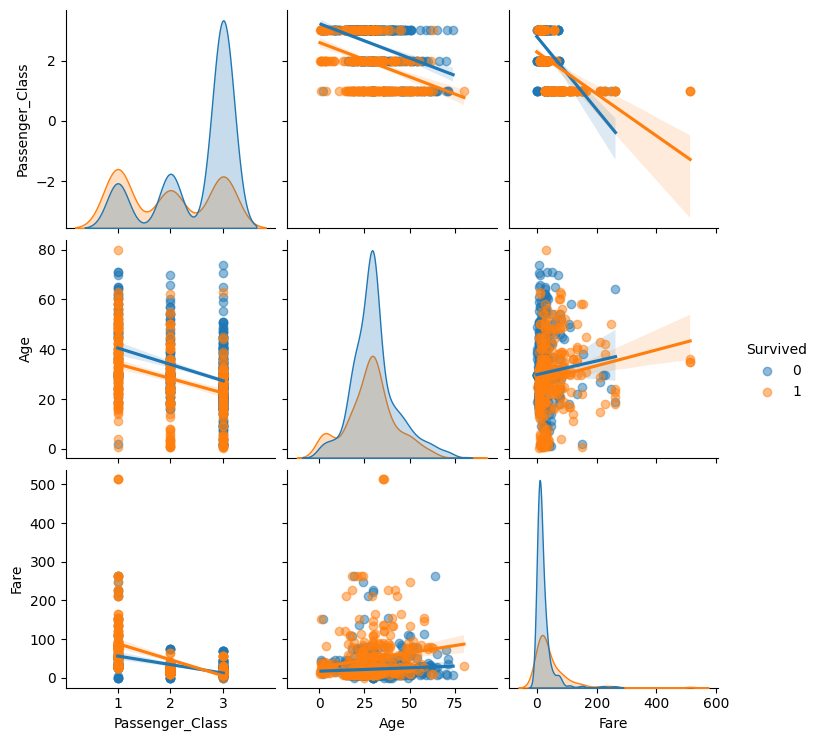

In [59]:
sns.pairplot(
    new_data[pairplot_cols].dropna(), 
    kind='reg',  # Adds regression lines
    hue='Survived', 
    plot_kws={'scatter_kws': {'alpha': 0.5}}
)

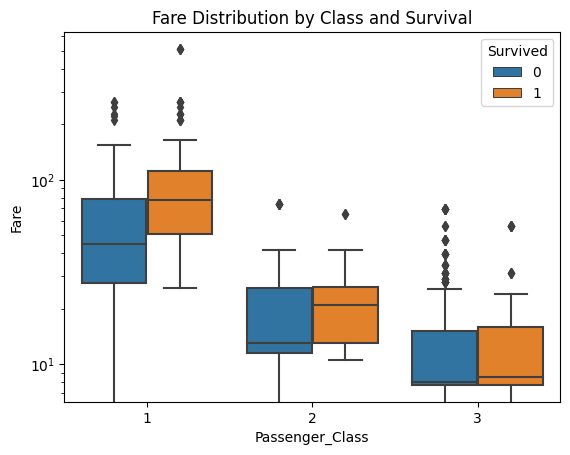

In [179]:
sns.boxplot(x='Passenger_Class', y='Fare', hue='Survived', data=new_data)
plt.yscale('log')  # Handle outliers
plt.title("Fare Distribution by Class and Survival");

In [60]:
print(new_data.describe())

       Passenger_id    Survived  Passenger_Class         Age  Siblings+Spouse  \
count    891.000000  891.000000       891.000000  891.000000       891.000000   
mean     446.000000    0.383838         2.308642   29.699118         0.523008   
std      257.353842    0.486592         0.836071   13.002015         1.102743   
min        1.000000    0.000000         1.000000    0.420000         0.000000   
25%      223.500000    0.000000         2.000000   22.000000         0.000000   
50%      446.000000    0.000000         3.000000   29.699118         0.000000   
75%      668.500000    1.000000         3.000000   35.000000         1.000000   
max      891.000000    1.000000         3.000000   80.000000         8.000000   

       Parents+children        Fare  Cabin_deck  
count        891.000000  891.000000  891.000000  
mean           0.381594   32.204208    1.283951  
std            0.806057   49.693429    2.460739  
min            0.000000    0.000000    0.000000  
25%            0.000

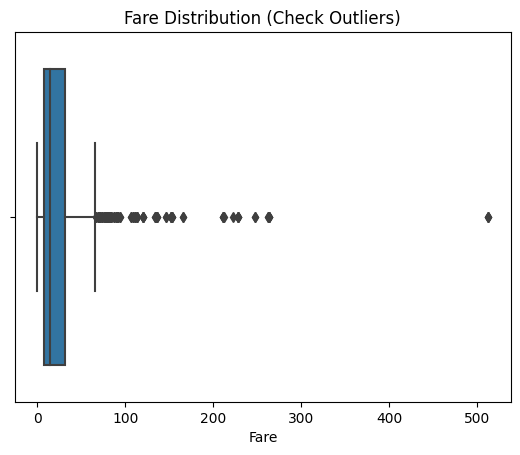

In [61]:
sns.boxplot(x=new_data['Fare'])
plt.title('Fare Distribution (Check Outliers)')
plt.show()

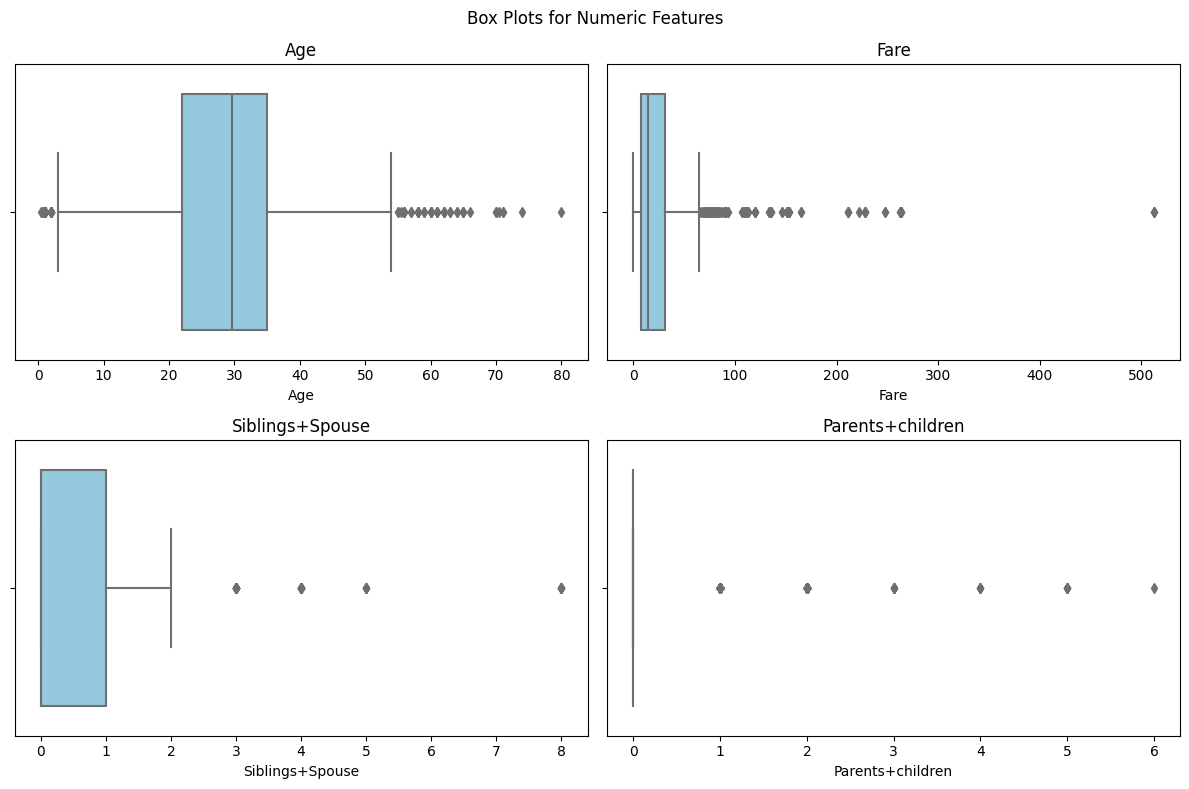

In [53]:
# Select numeric columns
numeric_cols = ['Age', 'Fare', 'Siblings+Spouse', 'Parents+children']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Box Plots for Numeric Features')

for col, ax in zip(numeric_cols, axes.ravel()):
    sns.boxplot(x=new_data[col], ax=ax, color='skyblue')
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [62]:
from scipy import stats
new_data['Fare_zscore'] = stats.zscore(new_data['Fare'])
anomalies = new_data[abs(new_data['Fare_zscore']) > 3]
print(anomalies[['Passenger_id', 'Fare']])

     Passenger_id      Fare
27             28  263.0000
88             89  263.0000
118           119  247.5208
258           259  512.3292
299           300  247.5208
311           312  262.3750
341           342  263.0000
377           378  211.5000
380           381  227.5250
438           439  263.0000
527           528  221.7792
557           558  227.5250
679           680  512.3292
689           690  211.3375
700           701  227.5250
716           717  227.5250
730           731  211.3375
737           738  512.3292
742           743  262.3750
779           780  211.3375


In [63]:
# Convert 'Ticket' prefix to analyze booking patterns (hypothetical)
new_data['Ticket_prefix'] = new_data['Ticket'].str.extract('([A-Za-z]+)')[0]
print(new_data['Ticket_prefix'].value_counts())

Ticket_prefix
PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
SO        1
Fa        1
SW        1
SCO       1
Name: count, dtype: int64


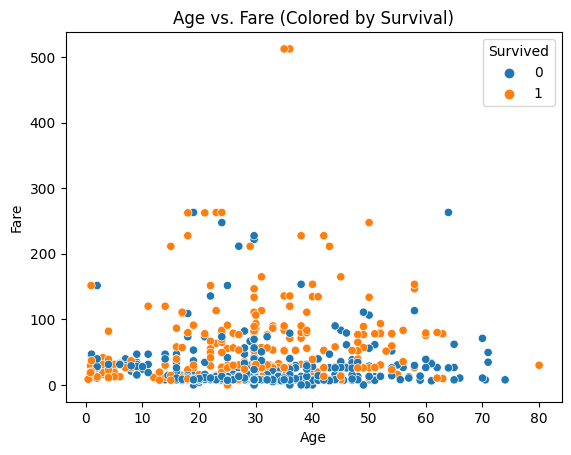

In [64]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=new_data)
plt.title('Age vs. Fare (Colored by Survival)')
plt.show()

In [66]:
new_data[new_data['Fare'] > 100][['Passenger_Class', 'Survived', 'Name']].head()

,Passenger_Class,Survived,Name
27,1,0,"Fortune, Mr. Charles Alexander"
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)"
88,1,1,"Fortune, Miss. Mabel Helen"
118,1,0,"Baxter, Mr. Quigg Edmond"
195,1,1,"Lurette, Miss. Elise"


<Axes: xlabel='Family_Size', ylabel='Survived'>

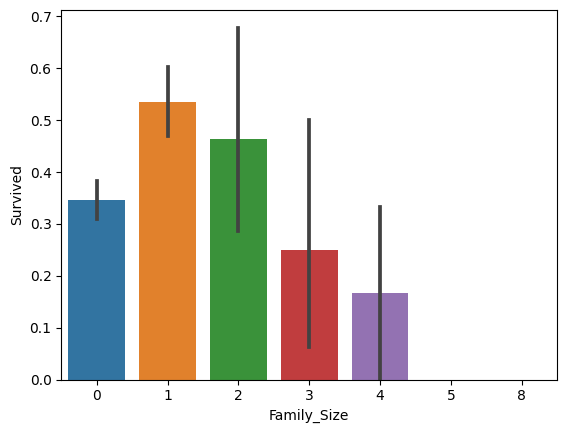

In [69]:
new_data['Family_Size'] = new_data['Siblings+Spouse']
sns.barplot(x='Family_Size', y='Survived', data=new_data)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_Group', ylabel='count'>

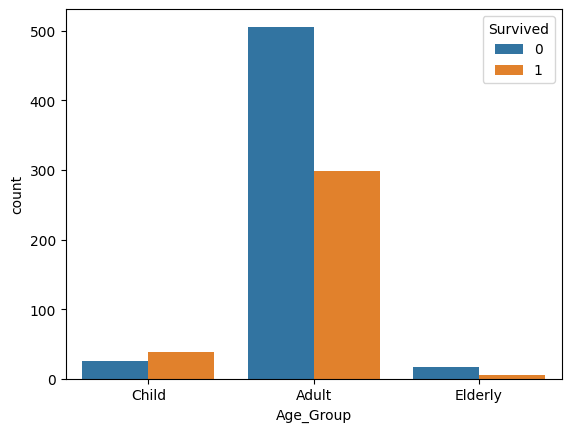

In [70]:
new_data['Age_Group'] = pd.cut(new_data['Age'], bins=[0, 10, 60, 100], labels=['Child', 'Adult', 'Elderly'])
sns.countplot(x='Age_Group', hue='Survived', data=new_data)

Text(0.5, 1.0, 'Age Distribution by Class and Survival')

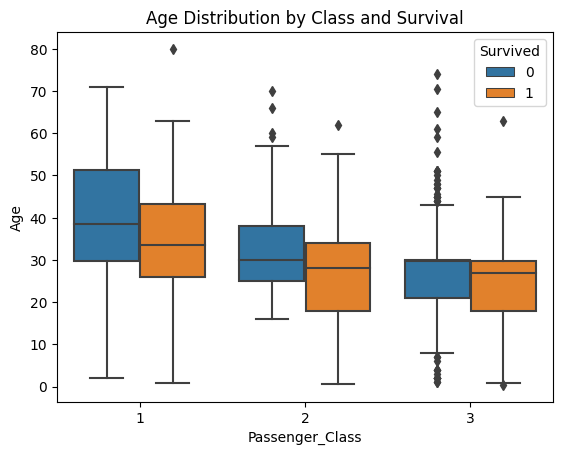

In [71]:
sns.boxplot(x='Passenger_Class', y='Age', hue='Survived', data=new_data)
plt.title('Age Distribution by Class and Survival')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Survived', ylabel='Age'>

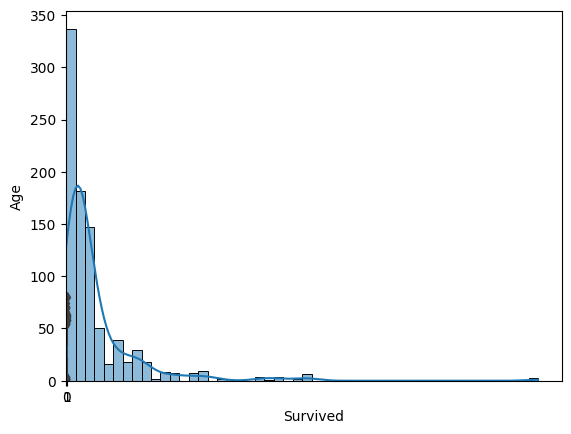

In [72]:
import seaborn as sns

# Survival by Class
sns.barplot(x='Passenger_Class', y='Survived', data=new_data)  

# Age vs. Survival
sns.boxplot(x='Survived', y='Age', data=new_data)  

# Fare Distribution
sns.histplot(new_data['Fare'], bins=50, kde=True)

Fruitful Insights obtained through these visuals:

Class & Fare: Wealthier passengers survived more.

Gender Bias: Rescue prioritized women.

Family Strategy: Small families had an advantage.

Port Impact: Cherbourg’s wealthier passengers fared better.

The imported dataset related to the Titanic ship has been thoroughly explored using built-in methods, and the characteristics of each field (column) have been examined by verifying their technical attributes. After preprocessing the data, actionable insights were delivered through colorful visualizations generated using Python’s data presentation tools. Thank you!